In [1]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# Load Data

In [3]:
combined_df = pd.read_csv('stemmed.csv')
combined_df

dialogue  gender
0                                                     NaN       1
1                                                     NaN       0
2                                                     NaN       1
3                                                    okay       0
4                                                  let go       1
...                                                   ...     ...
269943  attack defence well let cetshwayo offer impis ...       0
269944  got right lord lead invasion zululand see arou...       0
269945  spurred onto high ground lord full spirit look...       0
269946            indeedldid mylord itwas one ofthe first       0
269947                            excuse lord newman lord       0

[269948 rows x 2 columns]

In [5]:
#Drop the NaN values
combined_df = combined_df.dropna()
combined_df

dialogue  gender
3                                                    okay       0
4                                                  let go       1
5                                                     wow       0
6                               okay gonna need learn lie       1
8         kidding know sometimes become persona know quit       1
...                                                   ...     ...
269943  attack defence well let cetshwayo offer impis ...       0
269944  got right lord lead invasion zululand see arou...       0
269945  spurred onto high ground lord full spirit look...       0
269946            indeedldid mylord itwas one ofthe first       0
269947                            excuse lord newman lord       0

[249326 rows x 2 columns]

### Split into each gender

In [9]:
female_df = combined_df[combined_df.gender == 1]
male_df = combined_df[combined_df.gender == 0]
male_df

dialogue  gender
3                                                    okay       0
5                                                     wow       0
10                                                   real       0
12                      figured get good stuff eventually       0
13                          thank hear one story coiffure       0
...                                                   ...     ...
269943  attack defence well let cetshwayo offer impis ...       0
269944  got right lord lead invasion zululand see arou...       0
269945  spurred onto high ground lord full spirit look...       0
269946            indeedldid mylord itwas one ofthe first       0
269947                            excuse lord newman lord       0

[173943 rows x 2 columns]

In [10]:
female_df

dialogue  gender
4                                                let go       1
6                             okay gonna need learn lie       1
8       kidding know sometimes become persona know quit       1
9                              like fear wearing pastel       1
11                                           good stuff       1
...                                                 ...     ...
269927                                    look far come       1
269929                                    getting tired       1
269931                      working oh play beautifully       1
269933                                   schwanzstucker       1
269935                                must someone else       1

[75383 rows x 2 columns]

## Word Clouds

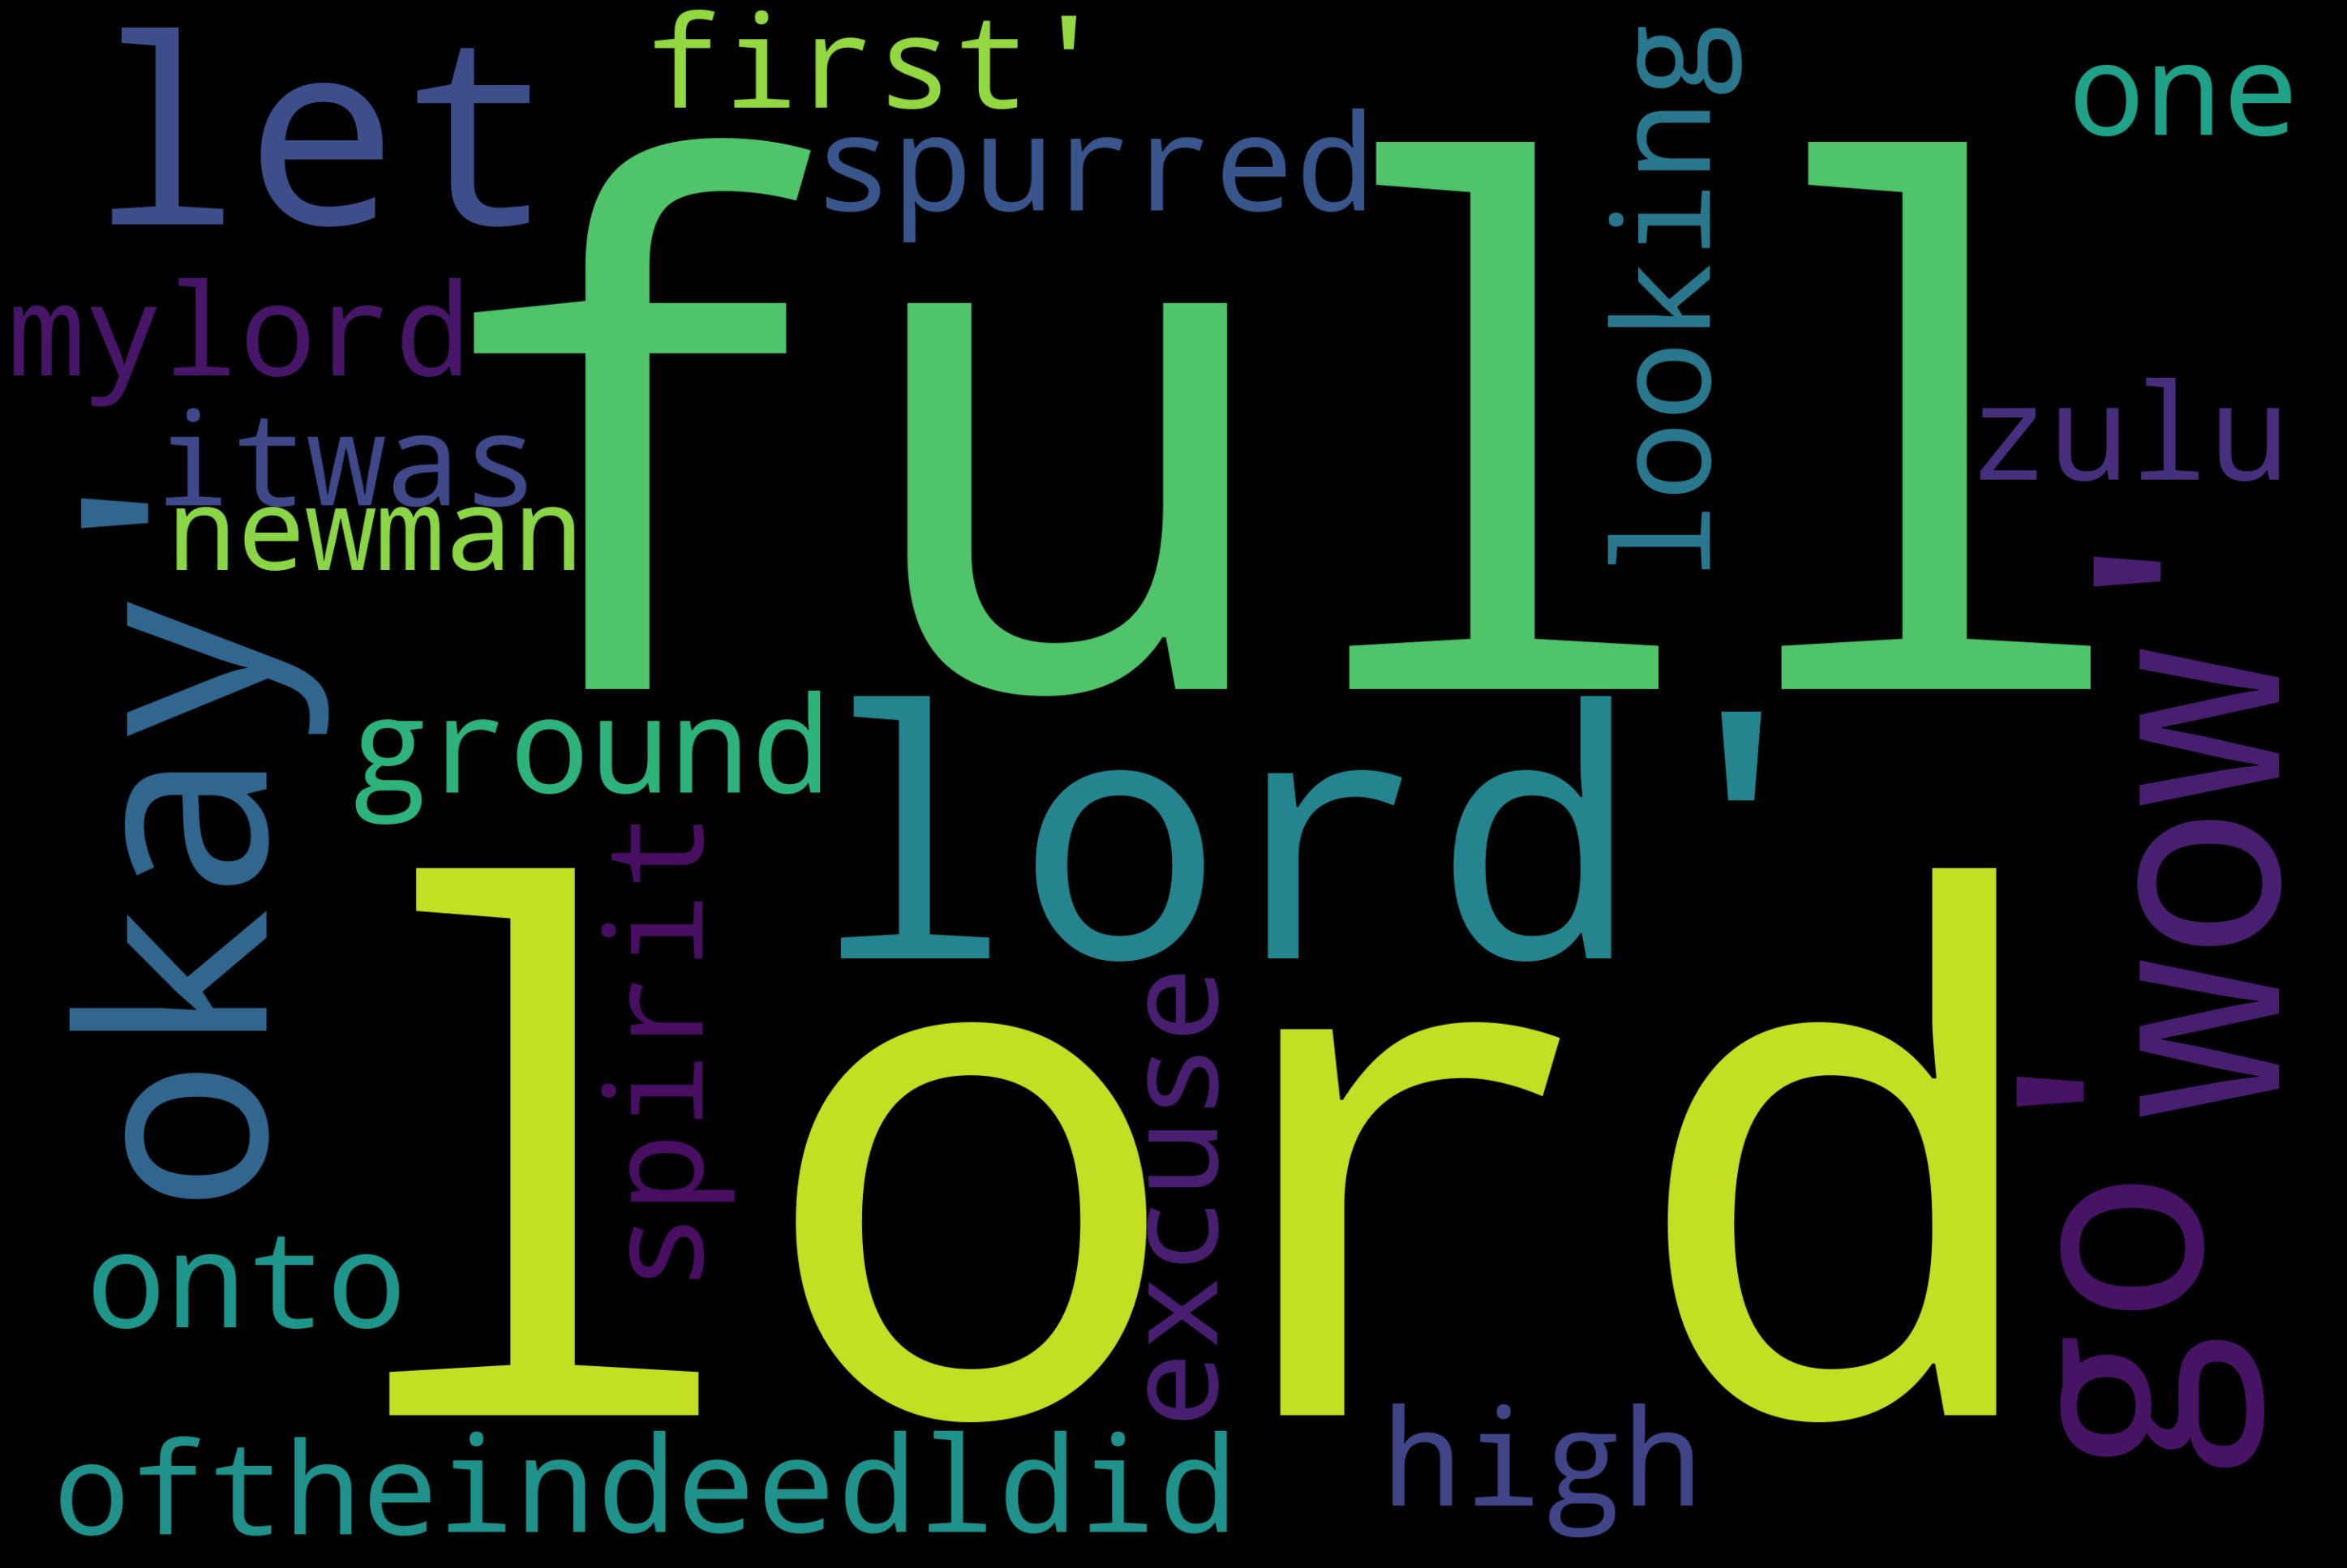

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = combined_df.dialogue.values
wordcloud1 = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
# plt.savefig('wordcloud_allg_lem1.png')
wordcloud1 =  wordcloud1.to_file('combinedcloud.png')

### Set stopwords

In [13]:
# Remove Stopwords
import nltk
!pip install --upgrade nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

Requirement already up-to-date: nltk in c:\users\positivelyalli\anaconda3\lib\site-packages (3.5)
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\positivelyalli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Add character names to stopwords because they create noise in the model
sw = stopwords.words('english')
# names = character_df['name']
# names = names.to_list()

# sw.extend(names)
print(sw)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Female word cloud

In [15]:
nltk.download('punkt')
import nltk 
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\positivelyalli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\positivelyalli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
#
import time
f_dialogue_list = []

count = 1
start_time =  pd.Timestamp.now(tz='US/Pacific')
time_now = start_time
delta_time = 0
progress = 0
rate = 0
eta = 0
total_units = len(female_df.dialogue)
time_end = 0
for dialogue in female_df.dialogue:
    time_now =  pd.Timestamp.now(tz='US/Pacific')
    delta_time = time_now - start_time
    rate = delta_time / count
    remaining = total_units - count
    eta = remaining * rate
    time_end = (start_time + eta) #to time stamp string....
    if count %10000 == 0:
      print(str(pd.Timestamp(time_end)))
      print(count)
    if count == 10:
      print(str(pd.Timestamp(time_end)))
      print(count)
    dialogue = nltk.word_tokenize(dialogue)
    dialogue = [ word for word in dialogue if not word in set(sw)]
    dialogue = " ".join(dialogue)
    f_dialogue_list.append(dialogue)
    count = count + 1
    
    
f_dialogue_list

2020-06-21 11:32:40.763982-07:00
10
2020-06-21 11:30:03.896357245-07:00
10000
2020-06-21 11:30:02.145208295-07:00
20000
2020-06-21 11:30:00.422398799-07:00
30000
2020-06-21 11:29:58.692949891-07:00
40000
2020-06-21 11:29:57.032229008-07:00
50000
2020-06-21 11:29:55.304332031-07:00
60000
2020-06-21 11:29:53.611098629-07:00
70000


['let go',
 'okay gon na need learn lie',
 'kidding know sometimes become persona know quit',
 'like fear wearing pastel',
 'good stuff',
 'endless babble like boring',
 'listen crap',
 'guillermo say go lighter gon na look like extra 90210',
 'well',
 'ton',
 'know',
 'hi',
 'know ever heard say dip dating smoke',
 'lesbian found picture jared leto one drawer pretty sure harboring sex tendency',
 'really really really wan na go unless go',
 'eber deep conditioner every two day never ever use blowdryer without diffuser attachment',
 'sweet',
 'counted help cause thug obviously failing ever going date',
 'little find wench date plan progressing',
 'forget',
 'want know say though want know useful thing like good store much champagne cost stuff like chat never life point someone',
 'c tete',
 'gosh could find',
 'unsolved mystery used really popular started high school like got sick something',
 'thing mercy particularly hideous breed loser date',
 'fault proper introduction',
 'asking c

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
#we can define max_features 
max_features = 1000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
#count_vectorizer = CountVectorizer(stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(f_dialogue_list).toarray() # x

print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

from sklearn.feature_extraction.text import CountVectorizer
# list of the text documents
text = f_dialogue_list
vectorizer = CountVectorizer()
#tokenize and build vocab
vectorizer.fit(text)
#summarize
print(vectorizer.vocabulary_)
word_count = vectorizer.vocabulary_
#encode doc
vector = vectorizer.transform(text)
#summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

1000 most common words: ['able', 'absolutely', 'accept', 'accident', 'account', 'act', 'acting', 'actually', 'address', 'admit', 'advice', 'affair', 'afford', 'afraid', 'afternoon', 'age', 'ago', 'agree', 'ah', 'ahead', 'air', 'airport', 'alive', 'allowed', 'alright', 'american', 'angry', 'animal', 'answer', 'anybody', 'anymore', 'apart', 'apartment', 'apologize', 'appreciate', 'arm', 'army', 'arrest', 'ask', 'asked', 'asking', 'asleep', 'asshole', 'attack', 'attention', 'aunt', 'aw', 'away', 'awful', 'awhile', 'baby', 'bad', 'bag', 'ball', 'bank', 'bar', 'bastard', 'bathroom', 'beach', 'beat', 'beautiful', 'bed', 'bedroom', 'beer', 'beg', 'begin', 'beginning', 'believe', 'best', 'bet', 'better', 'big', 'bird', 'birthday', 'bitch', 'black', 'blame', 'blind', 'blood', 'bloody', 'blow', 'blue', 'board', 'boat', 'book', 'boring', 'born', 'bother', 'bought', 'bout', 'brain', 'break', 'breakfast', 'breath', 'brilliant', 'bring', 'bringing', 'broke', 'broken', 'brought', 'buck', 'build', 'bu

{'let': 10728, 'go': 7776, 'okay': 12933, 'gon': 7835, 'na': 12313, 'need': 12413, 'learn': 10633, 'lie': 10784, 'kidding': 10240, 'know': 10340, 'sometimes': 17280, 'become': 1799, 'persona': 13727, 'quit': 14821, 'like': 10827, 'fear': 6774, 'wearing': 20951, 'pastel': 13493, 'good': 7845, 'stuff': 17951, 'endless': 6139, 'babble': 1502, 'boring': 2341, 'listen': 10880, 'crap': 4323, 'guillermo': 8101, 'say': 16119, 'lighter': 10818, 'look': 10999, 'extra': 6564, '90210': 299, 'well': 21005, 'ton': 18984, 'hi': 8615, 'ever': 6359, 'heard': 8439, 'dip': 5251, 'dating': 4697, 'smoke': 17112, 'lesbian': 10716, 'found': 7262, 'picture': 13862, 'jared': 9925, 'leto': 10731, 'one': 12980, 'drawer': 5664, 'pretty': 14404, 'sure': 18171, 'harboring': 8321, 'sex': 16521, 'tendency': 18560, 'really': 15044, 'wan': 20815, 'unless': 20026, 'eber': 5903, 'deep': 4840, 'conditioner': 3903, 'every': 6362, 'two': 19428, 'day': 4712, 'never': 12486, 'use': 20271, 'blowdryer': 2184, 'without': 21317, 

(75383, 21712)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


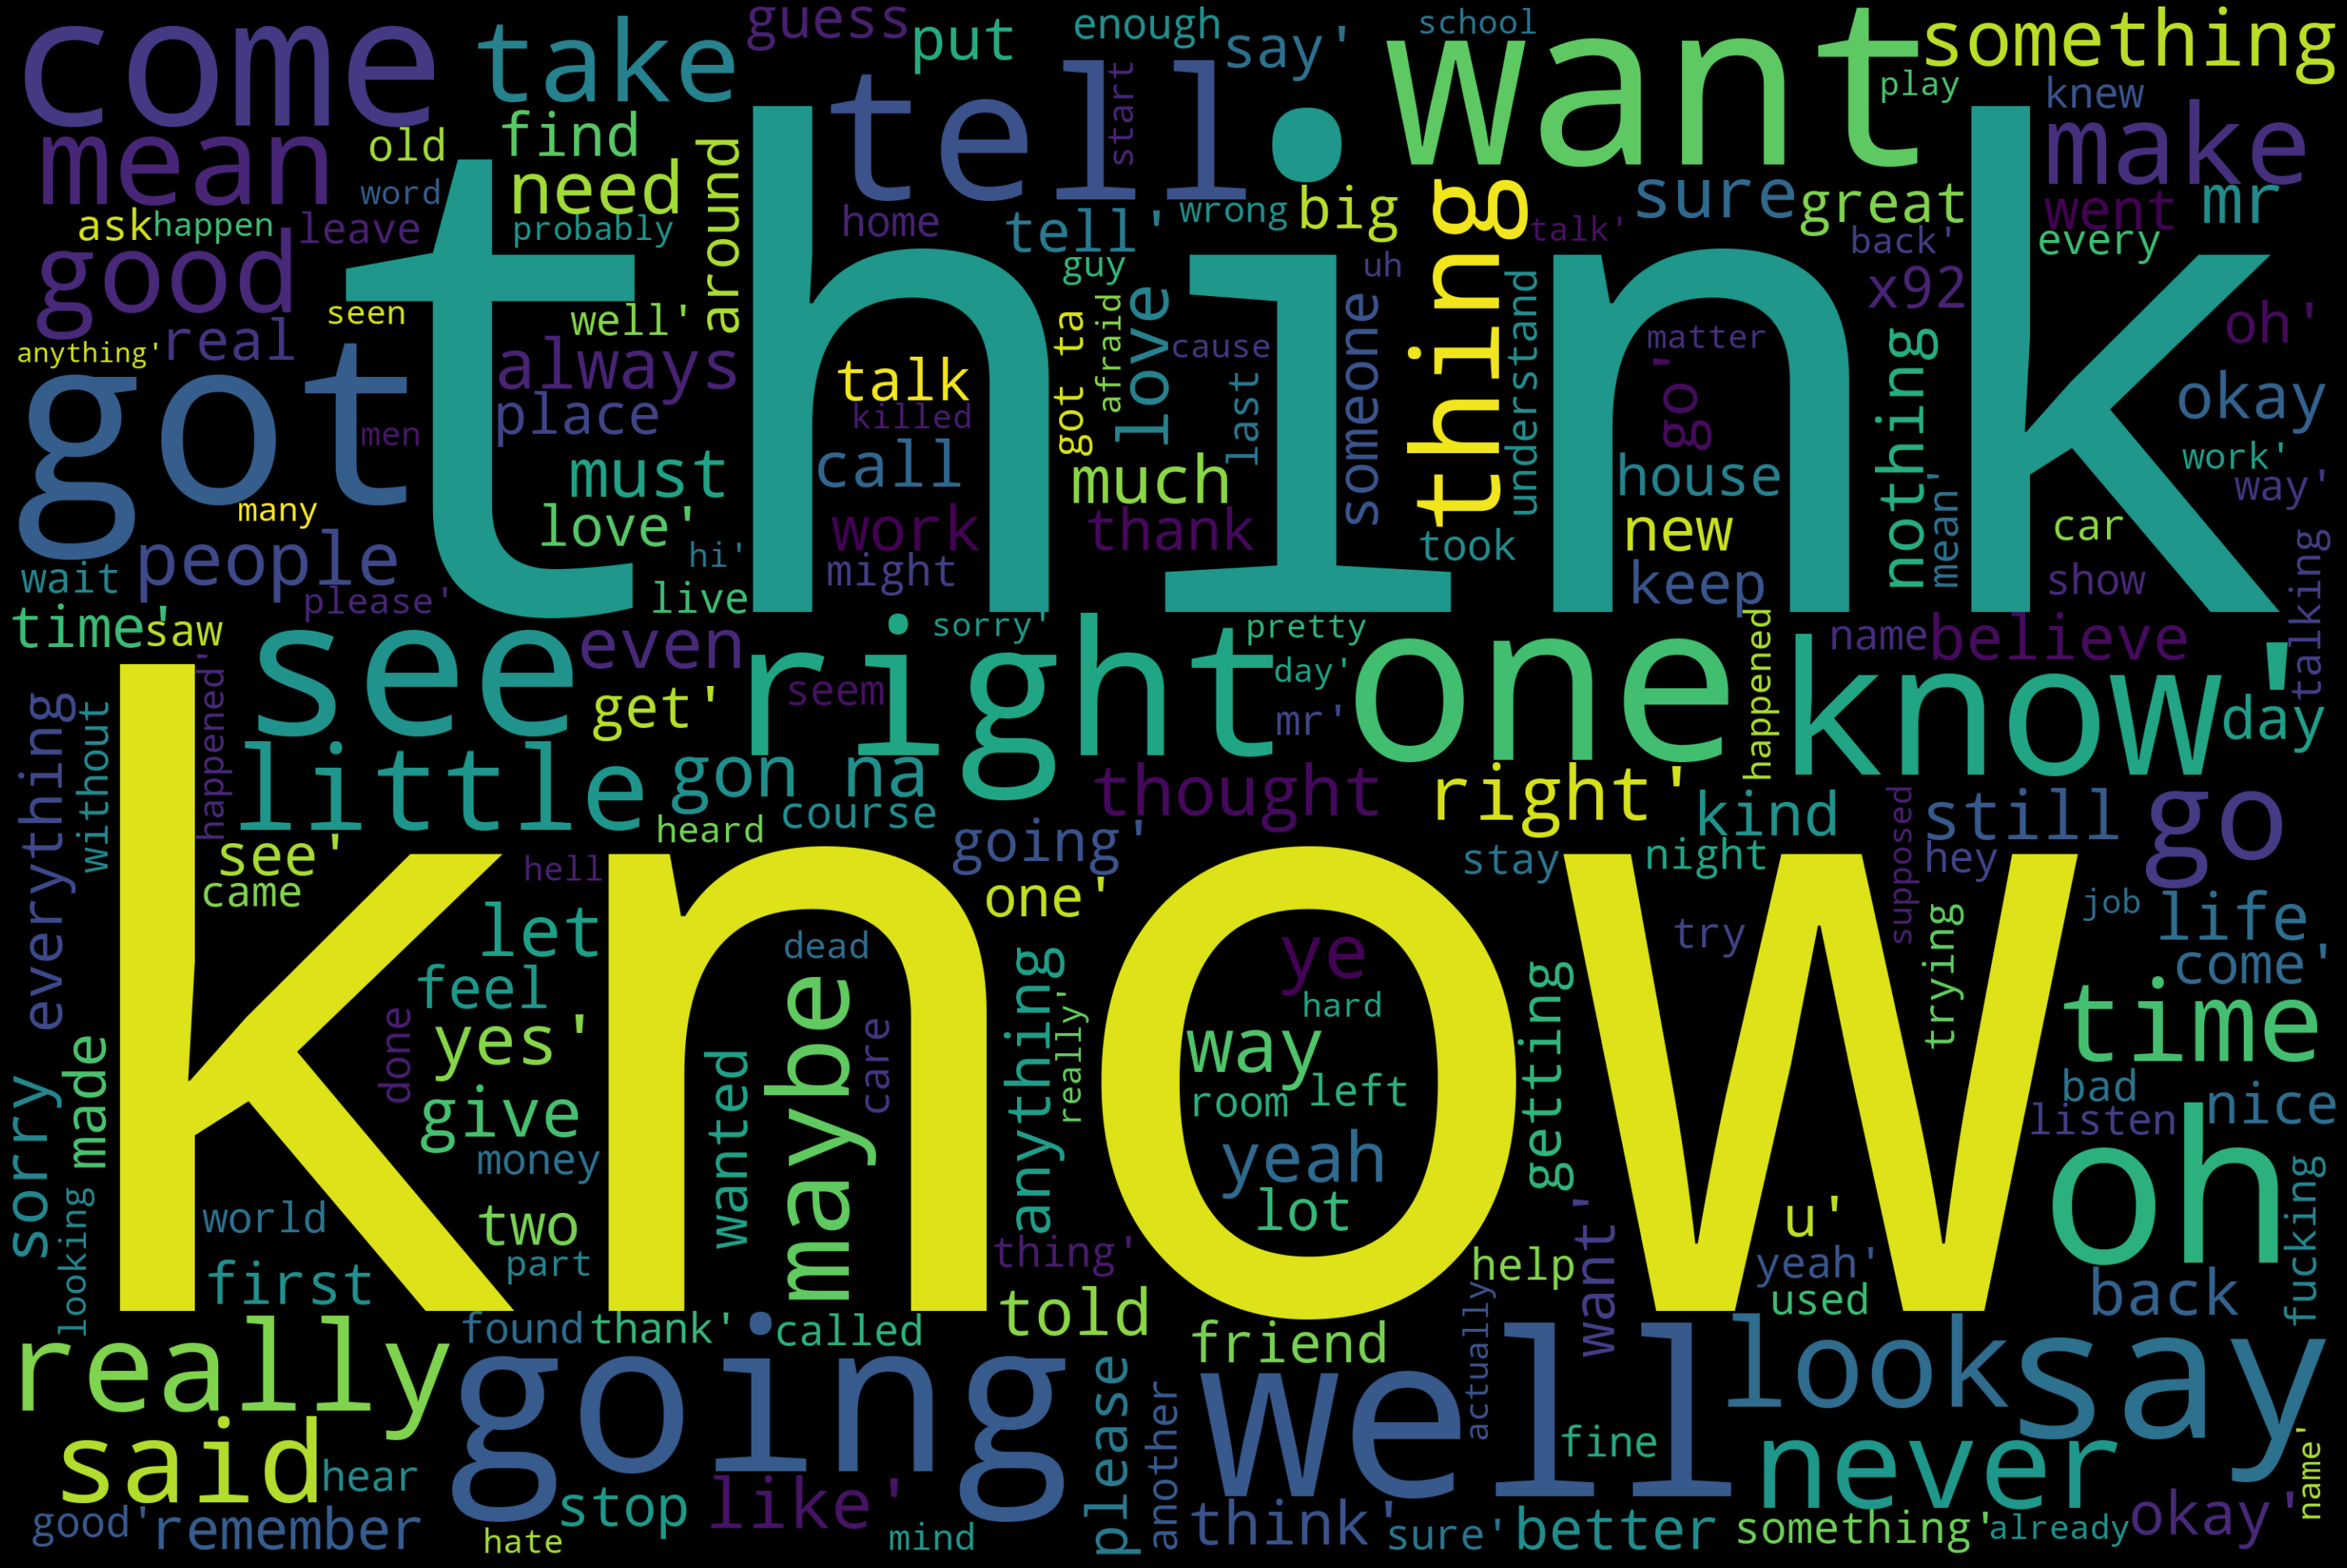

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = f_dialogue_list
wordcloudf = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('femalewordcloud_lem1.png')

In [34]:
wordcloudf =  wordcloudf.to_file('femalecloud.png')

In [20]:
word_count = vectorizer.vocabulary_
word_count

{'let': 10728,
 'go': 7776,
 'okay': 12933,
 'gon': 7835,
 'na': 12313,
 'need': 12413,
 'learn': 10633,
 'lie': 10784,
 'kidding': 10240,
 'know': 10340,
 'sometimes': 17280,
 'become': 1799,
 'persona': 13727,
 'quit': 14821,
 'like': 10827,
 'fear': 6774,
 'wearing': 20951,
 'pastel': 13493,
 'good': 7845,
 'stuff': 17951,
 'endless': 6139,
 'babble': 1502,
 'boring': 2341,
 'listen': 10880,
 'crap': 4323,
 'guillermo': 8101,
 'say': 16119,
 'lighter': 10818,
 'look': 10999,
 'extra': 6564,
 '90210': 299,
 'well': 21005,
 'ton': 18984,
 'hi': 8615,
 'ever': 6359,
 'heard': 8439,
 'dip': 5251,
 'dating': 4697,
 'smoke': 17112,
 'lesbian': 10716,
 'found': 7262,
 'picture': 13862,
 'jared': 9925,
 'leto': 10731,
 'one': 12980,
 'drawer': 5664,
 'pretty': 14404,
 'sure': 18171,
 'harboring': 8321,
 'sex': 16521,
 'tendency': 18560,
 'really': 15044,
 'wan': 20815,
 'unless': 20026,
 'eber': 5903,
 'deep': 4840,
 'conditioner': 3903,
 'every': 6362,
 'two': 19428,
 'day': 4712,
 'never'

In [21]:
type(word_count)

dict

Male word cloud

In [22]:
#
import time
m_dialogue_list = []

count = 1
start_time =  pd.Timestamp.now(tz='US/Pacific')
time_now = start_time
delta_time = 0
progress = 0
rate = 0
eta = 0
total_units = len(male_df.dialogue)
time_end = 0
for dialogue in male_df.dialogue:
    time_now =  pd.Timestamp.now(tz='US/Pacific')
    delta_time = time_now - start_time
    rate = delta_time / count
    remaining = total_units - count
    eta = remaining * rate
    time_end = (start_time + eta) #to time stamp string....
    if count %10000 == 0:
      print(str(pd.Timestamp(time_end)))
      print(count)
    if count == 10:
      print(str(pd.Timestamp(time_end)))
      print(count)
    dialogue = nltk.word_tokenize(dialogue)
    lemma = nltk.WordNetLemmatizer()
    dialogue = [lemma.lemmatize(word) for word in dialogue]
    dialogue = [ word for word in dialogue if not word in set(sw)]
    dialogue = " ".join(dialogue)
    m_dialogue_list.append(dialogue)
    count = count + 1
    
    
m_dialogue_list

2020-06-21 18:40:46.793152500-07:00
10
2020-06-21 11:34:55.911935452-07:00
10000
2020-06-21 11:34:40.875639240-07:00
20000
2020-06-21 11:34:34.372494635-07:00
30000
2020-06-21 11:34:30.155534423-07:00
40000
2020-06-21 11:34:26.940565750-07:00
50000
2020-06-21 11:34:24.099007424-07:00
60000
2020-06-21 11:34:21.516770629-07:00
70000
2020-06-21 11:34:19.054402365-07:00
80000
2020-06-21 11:34:16.688921705-07:00
90000
2020-06-21 11:34:14.447787584-07:00
100000
2020-06-21 11:34:12.269582730-07:00
110000
2020-06-21 11:34:10.100373266-07:00
120000
2020-06-21 11:34:07.972999101-07:00
130000
2020-06-21 11:34:05.882471851-07:00
140000
2020-06-21 11:34:03.803305265-07:00
150000
2020-06-21 11:34:01.747072672-07:00
160000
2020-06-21 11:33:59.701911338-07:00
170000


['okay',
 'wow',
 'real',
 'figured get good stuff eventually',
 'thank hear one story coiffure',
 'crap',
 'always selfish',
 'say',
 'never wanted go',
 'looked back party always seemed occupied',
 'fun tonight',
 'believe share instructor',
 'look like thing worked tonight huh',
 'kind like pretty one',
 'workin seem goin',
 'sure',
 'get hair look like',
 'word',
 'got something mind',
 'well someone think might',
 'nice one',
 'right see ready quiz',
 'let see',
 'shame',
 'seems like could get date easy enough',
 'forget',
 'okay bout try cuisine saturday night',
 'well thought start pronunciation okay',
 'listen want talk prom',
 'concentrating awfully hard considering gym',
 'hey sweet cheek',
 'say got good shot prada next year',
 'gay cruise line like wearing uniform stuff',
 'yeah got sears catalog thing going tube sock gig gon na huge ad next week',
 'exactly going bogey lowenbrau thing saturday',
 'missing something',
 'going unless go end story',
 'hot right want bend rul

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
#we can define max_features 
max_features = 1000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
#count_vectorizer = CountVectorizer(stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(m_dialogue_list).toarray() # x

print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

from sklearn.feature_extraction.text import CountVectorizer
# list of the text documents
text = m_dialogue_list
vectorizer = CountVectorizer()
#tokenize and build vocab
vectorizer.fit(text)
#summarize
print(vectorizer.vocabulary_)
word_countm = vectorizer.vocabulary_
#encode doc
vector = vectorizer.transform(text)
#summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

1000 most common words: ['able', 'absolutely', 'accept', 'accident', 'account', 'act', 'acting', 'action', 'actually', 'address', 'admit', 'advice', 'afford', 'afraid', 'afternoon', 'age', 'ago', 'agree', 'ah', 'ahead', 'air', 'airport', 'alive', 'alright', 'american', 'angry', 'answer', 'anybody', 'anymore', 'apart', 'apartment', 'apologize', 'appreciate', 'area', 'arm', 'army', 'arrest', 'ask', 'asked', 'asking', 'asleep', 'asshole', 'attack', 'attention', 'aw', 'away', 'awful', 'aye', 'bad', 'bag', 'ball', 'bank', 'bar', 'base', 'bastard', 'bathroom', 'beach', 'beat', 'beautiful', 'beauty', 'bed', 'beer', 'begin', 'beginning', 'believe', 'best', 'bet', 'better', 'big', 'bigger', 'bird', 'birthday', 'bitch', 'bite', 'black', 'blame', 'blind', 'block', 'blood', 'blow', 'blue', 'board', 'boat', 'bomb', 'book', 'born', 'bother', 'bottle', 'bought', 'bout', 'brain', 'break', 'breakfast', 'breath', 'bridge', 'bring', 'broke', 'broken', 'brother', 'brought', 'buck', 'build', 'building', 'b

{'okay': 22049, 'wow': 36249, 'real': 25583, 'figured': 11604, 'get': 12930, 'good': 13276, 'stuff': 30405, 'eventually': 10784, 'thank': 31476, 'hear': 14275, 'one': 22150, 'story': 30235, 'coiffure': 6377, 'crap': 7468, 'always': 1554, 'selfish': 27817, 'say': 27365, 'never': 21236, 'wanted': 35270, 'go': 13164, 'looked': 18650, 'back': 2715, 'party': 23017, 'seemed': 27765, 'occupied': 21881, 'fun': 12554, 'tonight': 32108, 'believe': 3331, 'share': 28083, 'instructor': 16188, 'look': 18647, 'like': 18327, 'thing': 31656, 'worked': 36178, 'huh': 15148, 'kind': 17327, 'pretty': 24536, 'workin': 36187, 'seem': 27764, 'goin': 13230, 'sure': 30739, 'hair': 13896, 'word': 36167, 'got': 13340, 'something': 29282, 'mind': 20065, 'well': 35545, 'someone': 29274, 'think': 31670, 'might': 19976, 'nice': 21300, 'right': 26624, 'see': 27751, 'ready': 25579, 'quiz': 25245, 'let': 18172, 'shame': 28060, 'seems': 27772, 'could': 7312, 'date': 8052, 'easy': 9967, 'enough': 10474, 'forget': 12151, '

(173943, 36811)
<class 'scipy.sparse.csr.csr_matrix'>


MemoryError: 

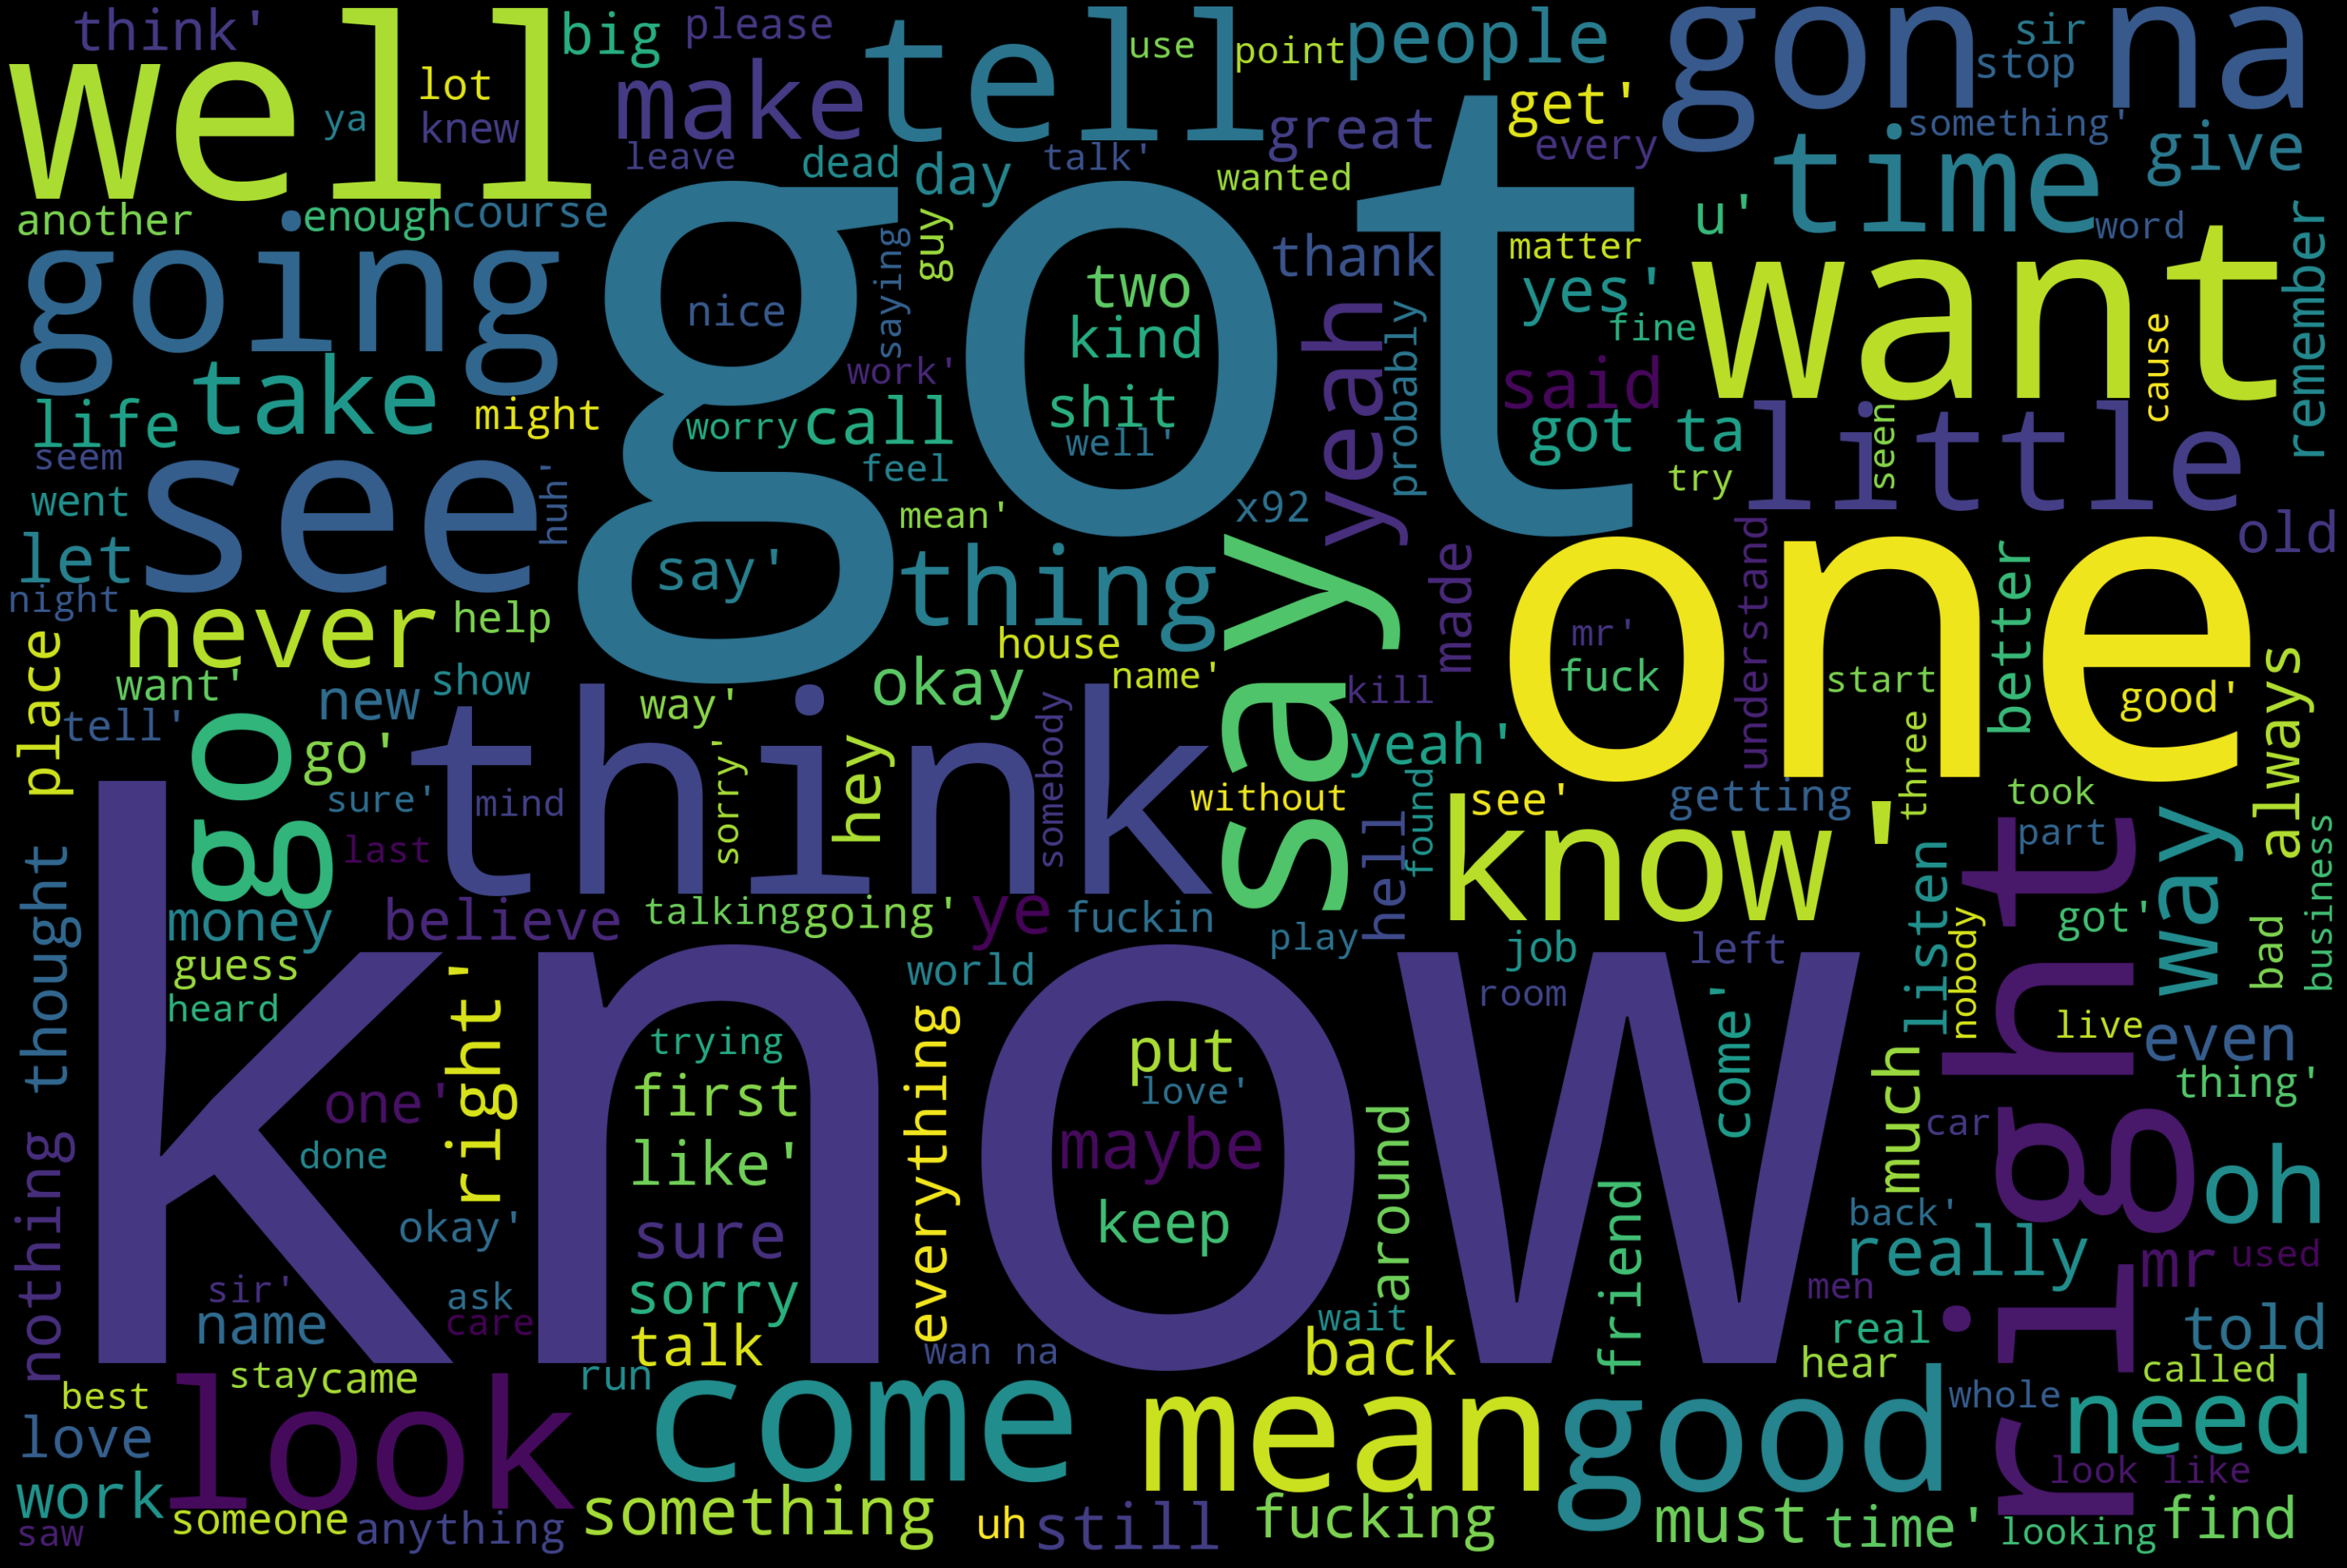

<Figure size 432x288 with 0 Axes>

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = m_dialogue_list
wordcloudm = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloudm, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
plt.savefig('malewordcloud_lem1.png')

In [35]:
wordcloudm =  wordcloudm.to_file('malecloud.png')

In [27]:
word_countm.sort()

{'okay': 22049,
 'wow': 36249,
 'real': 25583,
 'figured': 11604,
 'get': 12930,
 'good': 13276,
 'stuff': 30405,
 'eventually': 10784,
 'thank': 31476,
 'hear': 14275,
 'one': 22150,
 'story': 30235,
 'coiffure': 6377,
 'crap': 7468,
 'always': 1554,
 'selfish': 27817,
 'say': 27365,
 'never': 21236,
 'wanted': 35270,
 'go': 13164,
 'looked': 18650,
 'back': 2715,
 'party': 23017,
 'seemed': 27765,
 'occupied': 21881,
 'fun': 12554,
 'tonight': 32108,
 'believe': 3331,
 'share': 28083,
 'instructor': 16188,
 'look': 18647,
 'like': 18327,
 'thing': 31656,
 'worked': 36178,
 'huh': 15148,
 'kind': 17327,
 'pretty': 24536,
 'workin': 36187,
 'seem': 27764,
 'goin': 13230,
 'sure': 30739,
 'hair': 13896,
 'word': 36167,
 'got': 13340,
 'something': 29282,
 'mind': 20065,
 'well': 35545,
 'someone': 29274,
 'think': 31670,
 'might': 19976,
 'nice': 21300,
 'right': 26624,
 'see': 27751,
 'ready': 25579,
 'quiz': 25245,
 'let': 18172,
 'shame': 28060,
 'seems': 27772,
 'could': 7312,
 'dat

In [74]:
{k: v for k, v in sorted(word_countm.items(), key=lambda item: item[1], reverse=True)}

{'ŕquelqu': 36810,
 'łwar': 36809,
 'ł500': 36808,
 'ł4000': 36807,
 'ł3106': 36806,
 'ł20000': 36805,
 'ł15000': 36804,
 'ł150': 36803,
 'ł1000': 36802,
 'ętes': 36801,
 'ďretirement': 36800,
 'übermensch': 36799,
 'ôer': 36798,
 'ôcause': 36797,
 'ín': 36796,
 'éysée': 36795,
 'élysées': 36794,
 'ßoor': 36793,
 'zzzzzzzzzzzzzzzz': 36792,
 'zuul': 36791,
 'zurich': 36790,
 'zur': 36789,
 'zundinger': 36788,
 'zuma': 36787,
 'zululand': 36786,
 'zulu': 36785,
 'zu': 36784,
 'zt': 36783,
 'zowie': 36782,
 'zounds': 36781,
 'zot': 36780,
 'zorro': 36779,
 'zorin': 36778,
 'zord': 36777,
 'zooted': 36776,
 'zoom': 36775,
 'zoology': 36774,
 'zoological': 36773,
 'zookerman': 36772,
 'zookeeper': 36771,
 'zooie': 36770,
 'zoo': 36769,
 'zoning': 36768,
 'zone': 36767,
 'zombied': 36766,
 'zombie': 36765,
 'zoloft': 36764,
 'zogg': 36763,
 'zodiac': 36762,
 'zodda': 36761,
 'zloty': 36760,
 'zlat': 36759,
 'ziz': 36758,
 'zit': 36757,
 'zippo': 36756,
 'zipping': 36755,
 'zipper': 36754,
 '

In [40]:
word_countf = word_count
word_countf

{'okay': 22049,
 'wow': 36249,
 'real': 25583,
 'figured': 11604,
 'get': 12930,
 'good': 13276,
 'stuff': 30405,
 'eventually': 10784,
 'thank': 31476,
 'hear': 14275,
 'one': 22150,
 'story': 30235,
 'coiffure': 6377,
 'crap': 7468,
 'always': 1554,
 'selfish': 27817,
 'say': 27365,
 'never': 21236,
 'wanted': 35270,
 'go': 13164,
 'looked': 18650,
 'back': 2715,
 'party': 23017,
 'seemed': 27765,
 'occupied': 21881,
 'fun': 12554,
 'tonight': 32108,
 'believe': 3331,
 'share': 28083,
 'instructor': 16188,
 'look': 18647,
 'like': 18327,
 'thing': 31656,
 'worked': 36178,
 'huh': 15148,
 'kind': 17327,
 'pretty': 24536,
 'workin': 36187,
 'seem': 27764,
 'goin': 13230,
 'sure': 30739,
 'hair': 13896,
 'word': 36167,
 'got': 13340,
 'something': 29282,
 'mind': 20065,
 'well': 35545,
 'someone': 29274,
 'think': 31670,
 'might': 19976,
 'nice': 21300,
 'right': 26624,
 'see': 27751,
 'ready': 25579,
 'quiz': 25245,
 'let': 18172,
 'shame': 28060,
 'seems': 27772,
 'could': 7312,
 'dat

In [46]:
femaleword_set = set(word_countf.keys())

In [45]:
maleword_set = set(word_countm.keys())

In [69]:
fwc_df = pd.DataFrame.from_dict(word_countf, orient = 'index')
fwc_df = fwc_df.reset_index()
fwc_df.head()

index      0
0     okay  22049
1      wow  36249
2     real  25583
3  figured  11604
4      get  12930

In [70]:
fwc_df = fwc_df.rename(columns={
    'index': 'Word',
    0: 'Count'
})
fwc_df.head()

Word  Count
0     okay  22049
1      wow  36249
2     real  25583
3  figured  11604
4      get  12930

In [71]:
mwc_df = pd.DataFrame.from_dict(word_countm, orient = 'index')
mwc_df = mwc_df.reset_index()
mwc_df.head()

index      0
0     okay  22049
1      wow  36249
2     real  25583
3  figured  11604
4      get  12930

In [72]:
mwc_df = mwc_df.rename(columns={
    'index': 'Word',
    0: 'Count'
})
fwc_df.head()

Word  Count
0     okay  22049
1      wow  36249
2     real  25583
3  figured  11604
4      get  12930